/var/folders/kb/1rjhgcjx66nby2g2h0tskpjc0000gn/T/ipykernel_7676/3373420862.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'is_nan_{col}'] = X[col].isna().astype(int)
/var/folders/kb/1rjhgcjx66nby2g2h0tskpjc0000gn/T/ipykernel_7676/3373420862.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'is_nan_{col}'] = X[col].isna().astype(int)
/var/folders/kb/1rjhgcjx66nby2g2h0tskpjc0000gn/T/ipykernel_7676/3373420862.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Top 20 most important features:
B_avg_CTRL_time(seconds): 0.3433
B_avg_opp_CTRL_time(seconds): 0.2908
R_avg_CTRL_time(seconds): 0.2724
B_avg_TOTAL_STR_att: 0.2647
B_avg_opp_TOTAL_STR_att: 0.2438
R_avg_TOTAL_STR_att: 0.2144
B_avg_SIG_STR_att: 0.2120
B_avg_opp_SIG_STR_att: 0.2005
R_avg_opp_TOTAL_STR_att: 0.1958
R_avg_opp_CTRL_time(seconds): 0.1918
R_avg_SIG_STR_att: 0.1769
B_avg_DISTANCE_att: 0.1748
B_avg_opp_DISTANCE_att: 0.1700
B_avg_HEAD_att: 0.1679
R_avg_opp_SIG_STR_att: 0.1678
B_avg_opp_HEAD_att: 0.1577
R_avg_DISTANCE_att: 0.1495
R_avg_opp_DISTANCE_att: 0.1455
R_avg_HEAD_att: 0.1396
B_avg_TOTAL_STR_landed: 0.1377


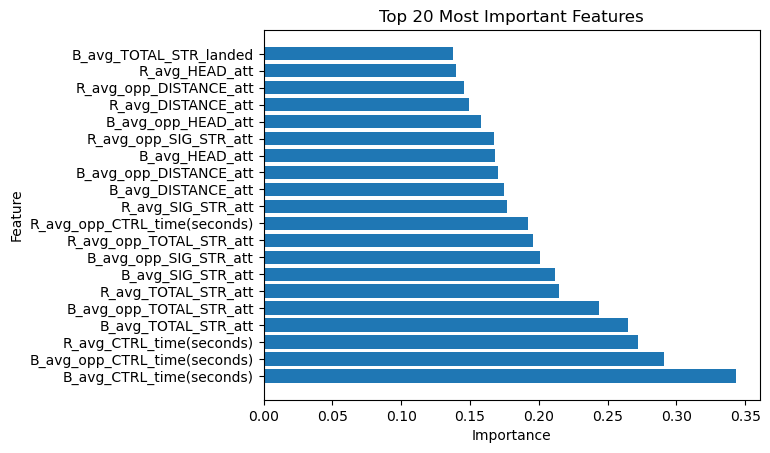

In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("data.csv/data.csv")
not_include_list = ["Referee","date","location","R_fighter","B_fighter","R_total_time_fought(seconds)","B_total_time_fought(seconds)","R_Weight_lbs","B_Weight_lbs"]
processed_df = df.drop(columns=not_include_list)
X = processed_df.drop(columns=["Winner"])
X = X.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
string_cols = X.select_dtypes(['object']).columns

# one-hot encode all string columns
new_df = pd.get_dummies(X, columns=string_cols, drop_first=True)

X = new_df

y = df["Winner"]
# select all boolean columns
bool_cols = new_df.select_dtypes(['bool']).columns

# convert boolean values to 0/1
new_df[bool_cols] = new_df[bool_cols].astype(int)

from sklearn.preprocessing import LabelEncoder

# assume 'df' is your dataframe and 'column_name' is the column you want to label encode
le = LabelEncoder()

y = le.fit_transform(y)

nan_cols = X.columns[X.isna().any()].tolist()

for col in nan_cols:
    X[f'is_nan_{col}'] = X[col].isna().astype(int)
    X[col] = X[col].fillna(0)

from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)  # retain 95% of the variance

# Fit the PCA object to the data and transform it
X_pca = pca.fit_transform(X)

# Get the most important columns (features)
importance = pca.components_[0]

# Get the feature names
feature_names = X.columns

# Sort the feature names by importance
sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 most important features
print("Top 20 most important features:")
for feature, importance in sorted_features[:20]:
    print(f"{feature}: {importance:.4f}")


import matplotlib.pyplot as plt

# Get the top 10 most important features
# sorted_features = sorted(zip(feature_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Extract the feature names and importance values
feature_names = [x[0] for x in sorted_features[:20]]
importance_values = [x[1] for x in sorted_features[:20]]

# Create a bar graph
plt.barh(range(len(feature_names)), importance_values)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.show()

In [2]:
X_new = X[feature_names]

In [3]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2)

In [6]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
model.score(X_test,y_test)

0.6749792186201163

In [8]:
model.coef_

array([[ 1.67989503e-03,  6.91940774e-04, -6.24552392e-04,
        -5.18739024e-03,  4.49203995e-03,  2.78766306e-03,
         1.13592503e-02, -9.98489490e-03,  9.75176059e-04,
         5.65653633e-04, -2.38398514e-03, -3.50383032e-03,
        -2.04869567e-03,  4.70041739e-03,  9.45721243e-03,
         6.92213874e-03, -1.12586293e-02, -4.69273506e-03,
         1.15702787e-02, -3.73579516e-03],
       [-2.47800545e-03, -6.44966069e-04,  4.67559419e-04,
        -2.13224693e-03, -1.37979887e-02, -6.65841458e-03,
        -7.22664917e-03, -4.07271598e-04, -7.76772591e-03,
        -6.56744778e-04, -1.12449332e-02,  1.17351343e-02,
         1.97710217e-02, -1.31803258e-02, -6.08216033e-03,
        -5.91944932e-03,  3.71884094e-02,  4.99222020e-03,
        -2.33485633e-02,  1.14625682e-02],
       [ 7.98110415e-04, -4.69747049e-05,  1.56992973e-04,
         7.31963717e-03,  9.30594879e-03,  3.87075152e-03,
        -4.13260115e-03,  1.03921665e-02,  6.79254985e-03,
         9.10911443e-05,  1.3

In [9]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [11]:
clf.score(X_test,y_test)

0.6774729842061513

In [12]:
clf.score(X_train,y_train)

0.6579330422125182

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

[Text(0.5, 0.8333333333333334, 'B_avg_opp_TD_pct <= 65.623\ngini = 0.461\nsamples = 4809\nvalue = [1562, 83, 3164]\nclass = Red'),
 Text(0.25, 0.5, 'B_avg_opp_SIG_STR_landed <= 48.172\ngini = 0.415\nsamples = 2959\nvalue = [788, 50, 2121]\nclass = Red'),
 Text(0.125, 0.16666666666666666, 'gini = 0.347\nsamples = 1504\nvalue = [304, 24, 1176]\nclass = Red'),
 Text(0.375, 0.16666666666666666, 'gini = 0.467\nsamples = 1455\nvalue = [484, 26, 945]\nclass = Red'),
 Text(0.75, 0.5, 'B_avg_opp_TOTAL_STR_att <= 41.595\ngini = 0.507\nsamples = 1850\nvalue = [774, 33, 1043]\nclass = Red'),
 Text(0.625, 0.16666666666666666, 'gini = 0.479\nsamples = 649\nvalue = [226, 13, 410]\nclass = Red'),
 Text(0.875, 0.16666666666666666, 'gini = 0.514\nsamples = 1201\nvalue = [548, 20, 633]\nclass = Red')]

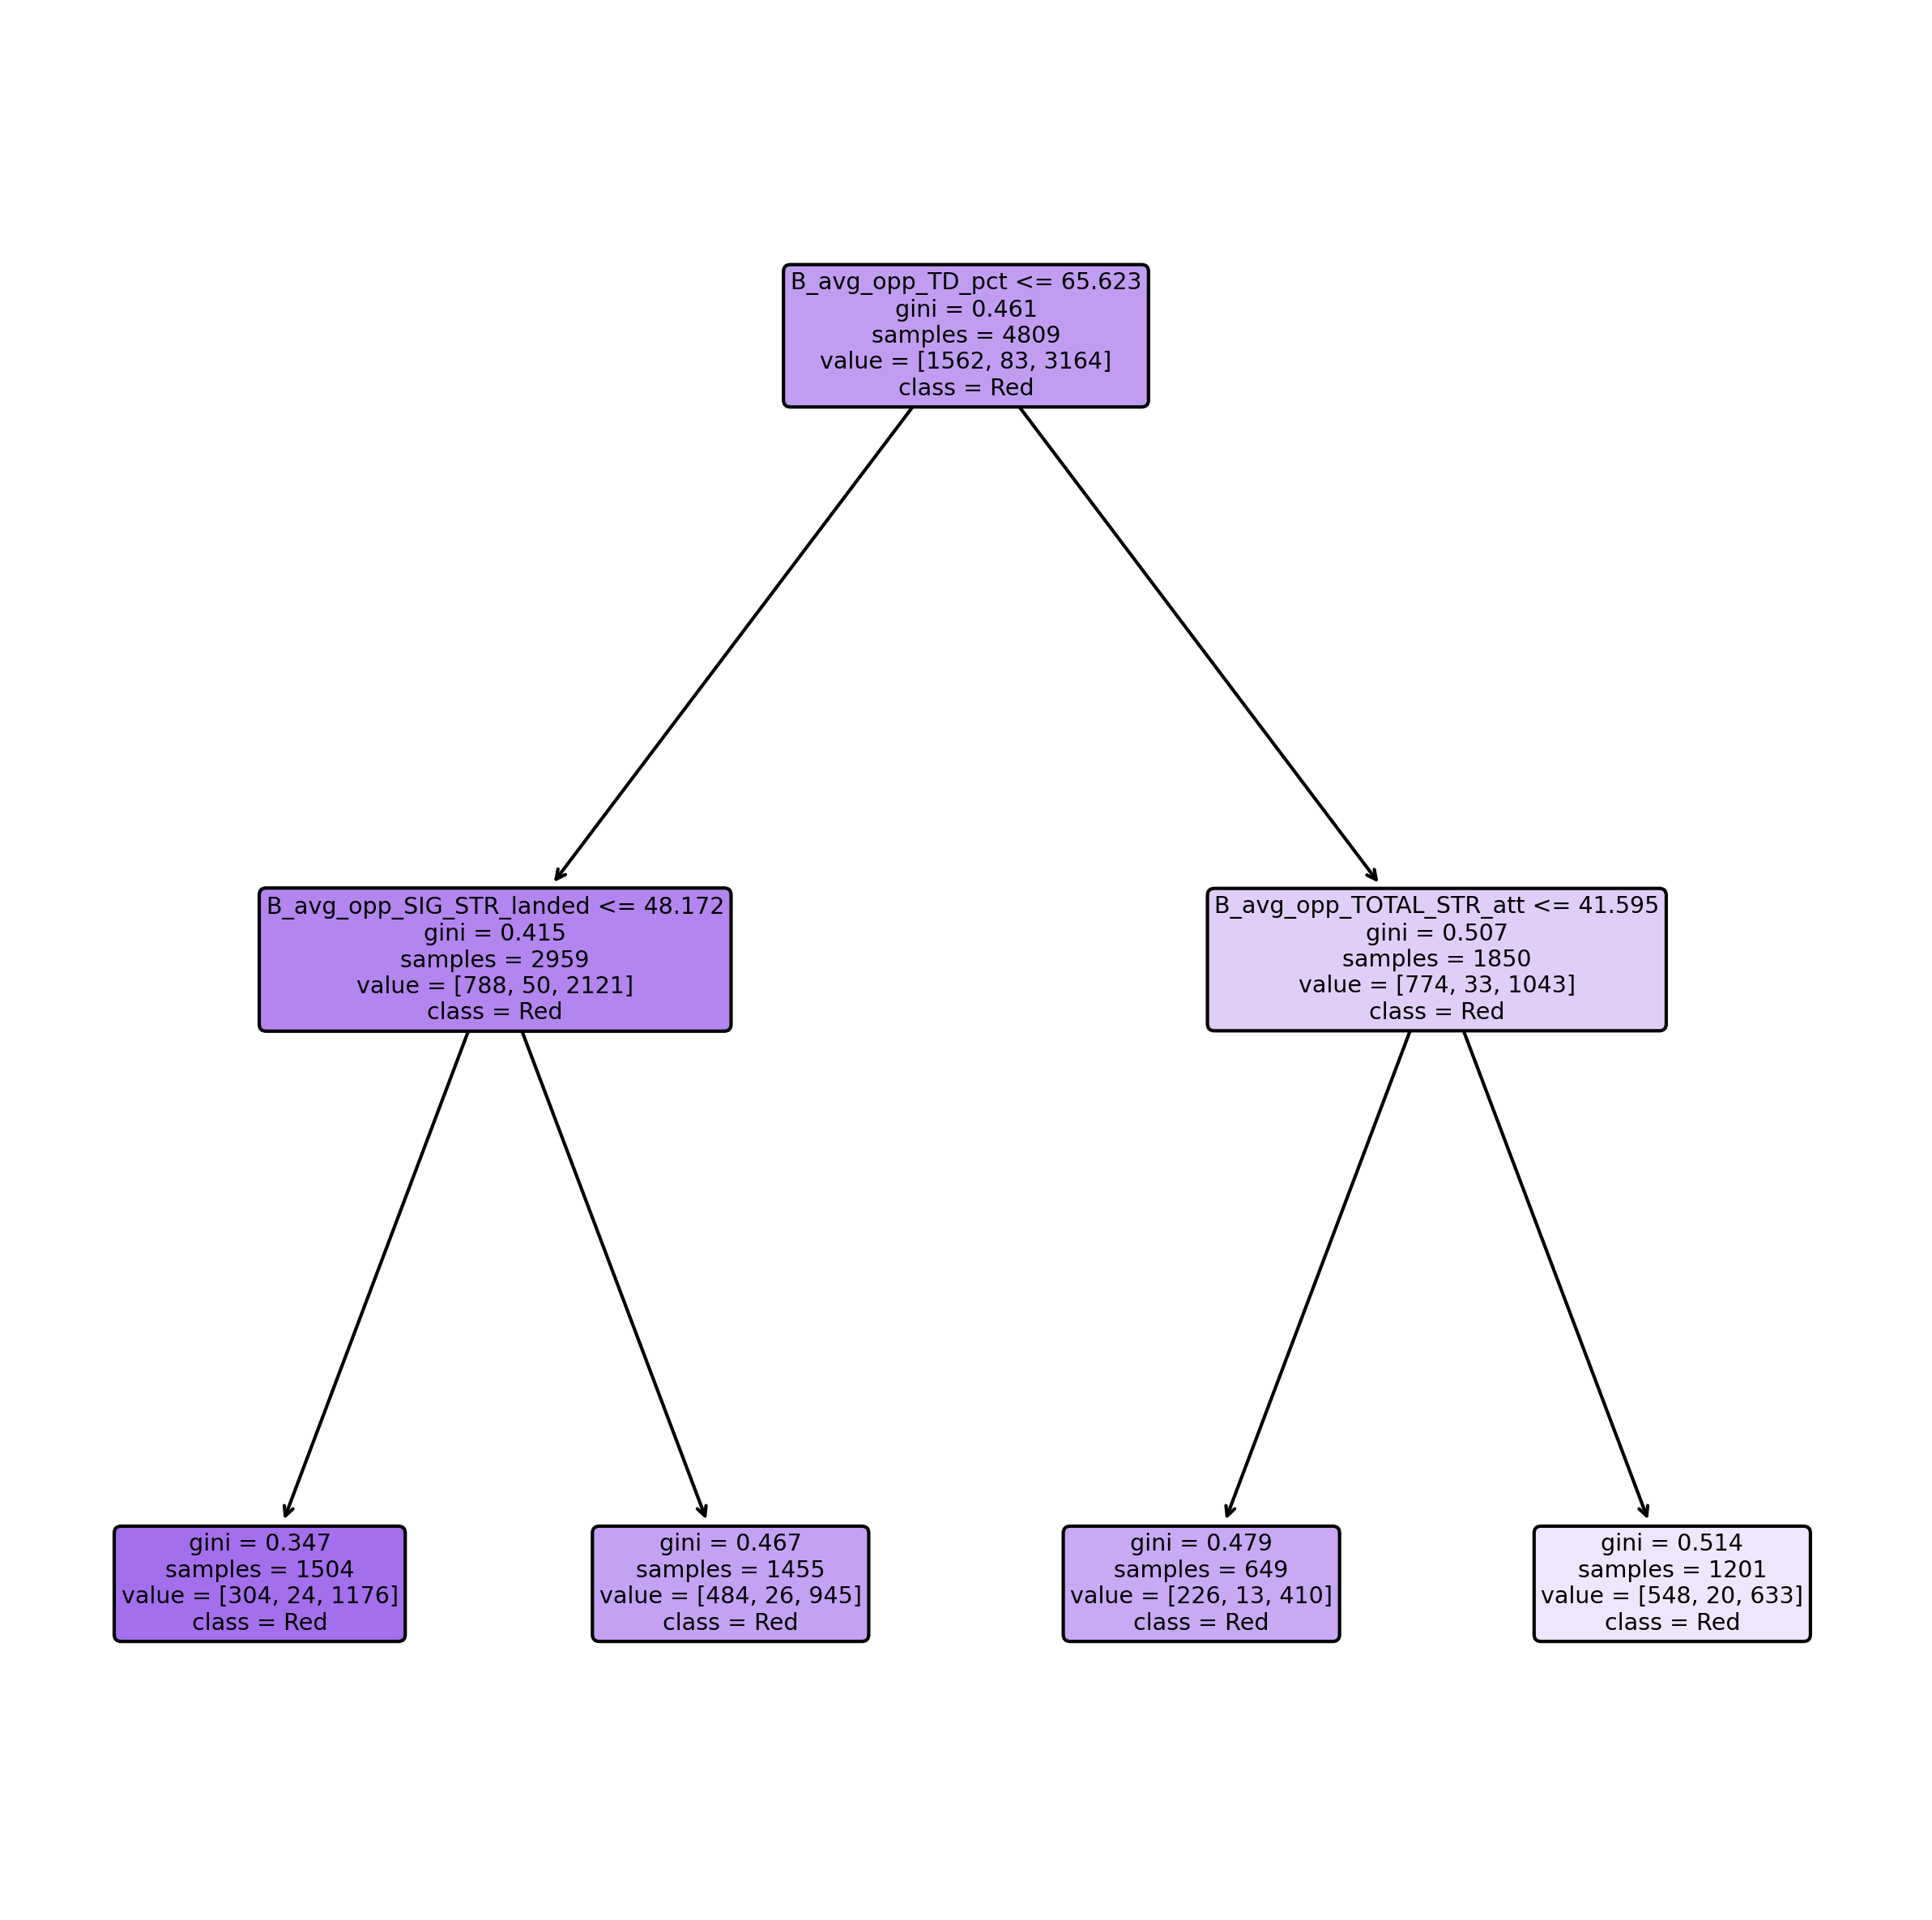

In [14]:
plt.figure(figsize=(10, 10), dpi=300)
# plot_tree(clf, filled=True, rounded=True, feature_names=X.columns.tolist())
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns.tolist(),
          class_names=['Blue', 'Draw','Red'], # add class names
           label='all') 

In [15]:
clf = RandomForestClassifier(n_estimators=500,max_depth=9).fit(X_train, y_train)

In [16]:
clf.score(X_test,y_test)

0.6766417290108063

In [17]:
clf.score(X_train,y_train)

0.7941359950093575

In [18]:
from sklearn import svm
clf = svm.SVC()

In [19]:
clf.fit(X_train,y_train)

SVC()

In [20]:
clf.score(X_test,y_test)

0.6724854530340815

In [21]:
clf.score(X_train,y_train)

0.6652110625909753

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
clf = MLPClassifier(alpha=1e-4,
hidden_layer_sizes=(10, 10))

In [24]:
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10))

In [25]:
clf.score(X_test,y_test)

0.6334164588528678

In [26]:
clf.score(X_train,y_train)

0.6269494697442296

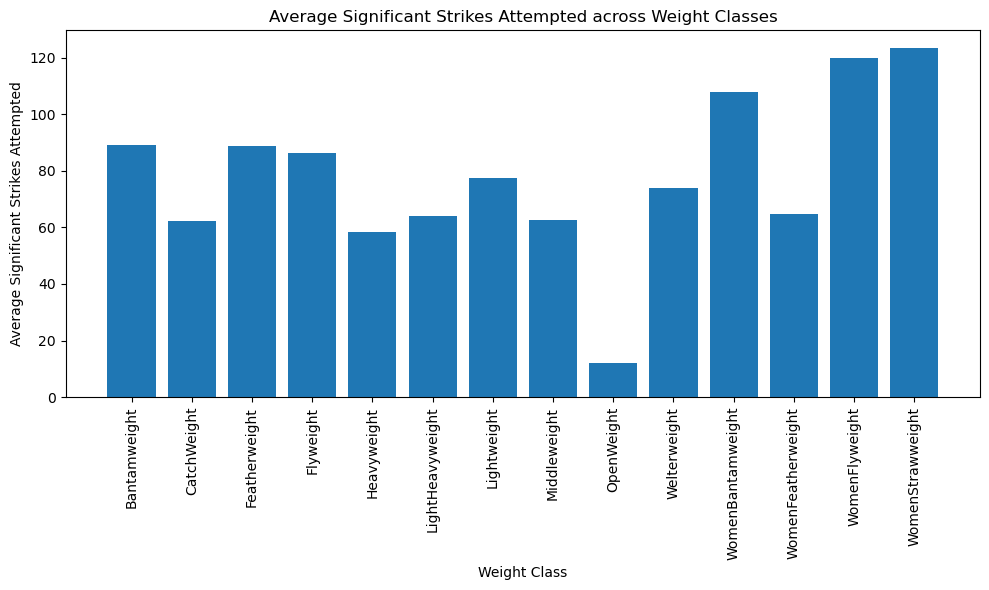

In [27]:
avg_sig_str = processed_df.groupby('weight_class')['B_avg_SIG_STR_att'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(avg_sig_str['weight_class'], avg_sig_str['B_avg_SIG_STR_att'])
ax.set_xlabel('Weight Class')
ax.set_ylabel('Average Significant Strikes Attempted')
ax.set_title('Average Significant Strikes Attempted across Weight Classes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


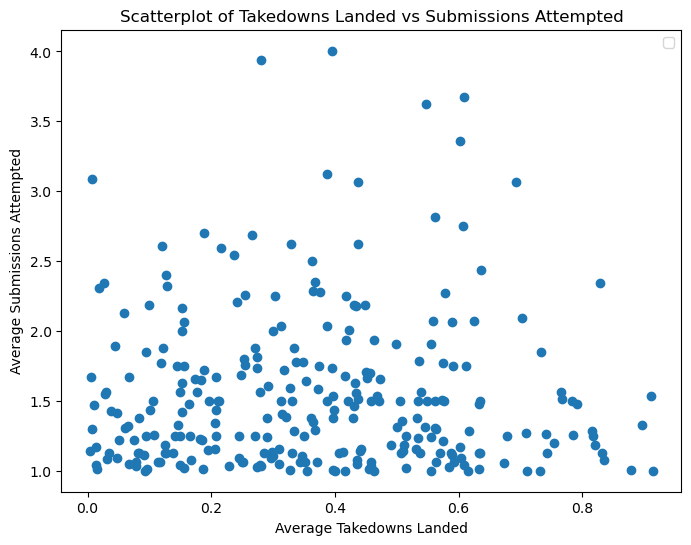

In [28]:
filtered_df = df.dropna(subset=['B_avg_TD_pct', 'B_avg_SUB_ATT'])
filtered_df = filtered_df[(filtered_df['B_avg_TD_pct'] > 0) & (filtered_df['B_avg_SUB_ATT'] >= 1)]
filtered_df = filtered_df[(filtered_df['B_total_rounds_fought'] > 10)]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['B_avg_TD_pct'], filtered_df['B_avg_SUB_ATT'])
plt.xlabel('Average Takedowns Landed')
plt.ylabel('Average Submissions Attempted')
plt.title('Scatterplot of Takedowns Landed vs Submissions Attempted')

slope, intercept, r_value, p_value, std_err = linregress(filtered_df['B_avg_TD_pct'], filtered_df['B_avg_SUB_ATT'])

x_min = filtered_df['B_avg_TD_pct'].min()
x_max = filtered_df['B_avg_TD_pct'].max()

x = np.linspace(x_min, x_max, 100)
y = slope * x + intercept

plt.legend()
plt.show()

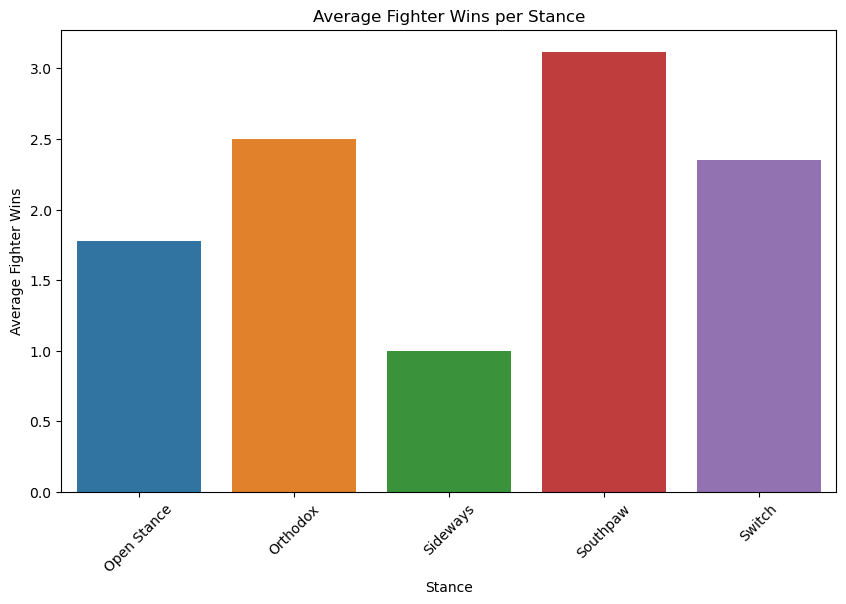

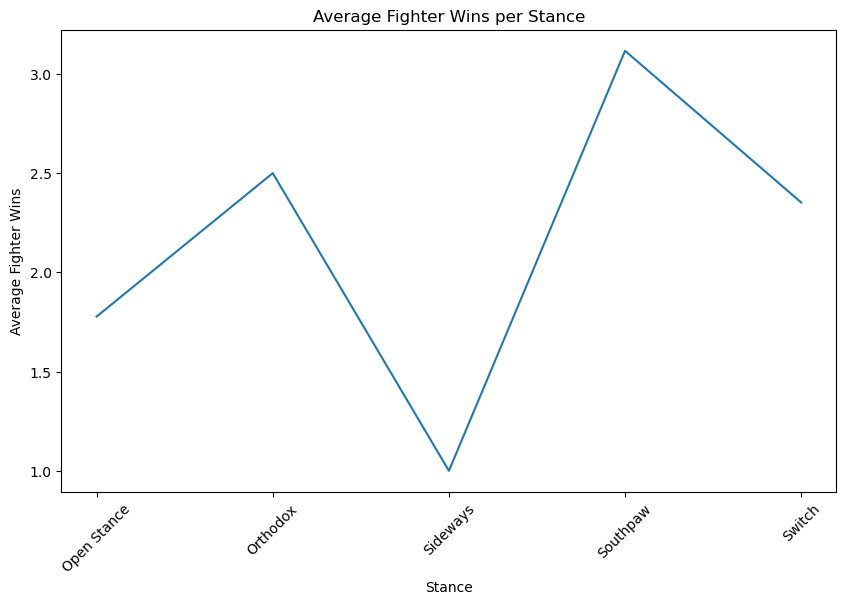

In [29]:
avg_wins_by_stance = df.groupby('B_Stance')['B_wins'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='B_Stance', y='B_wins', data=avg_wins_by_stance)
plt.title('Average Fighter Wins per Stance')
plt.xlabel('Stance')
plt.ylabel('Average Fighter Wins')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='B_Stance', y='B_wins', data=avg_wins_by_stance)
plt.title('Average Fighter Wins per Stance')
plt.xlabel('Stance')
plt.ylabel('Average Fighter Wins')
plt.xticks(rotation=45)
plt.show()

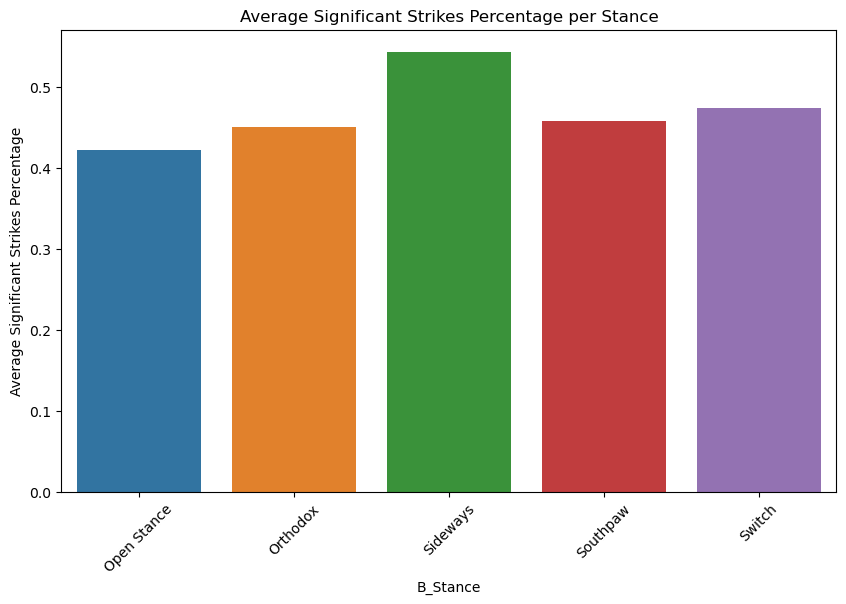

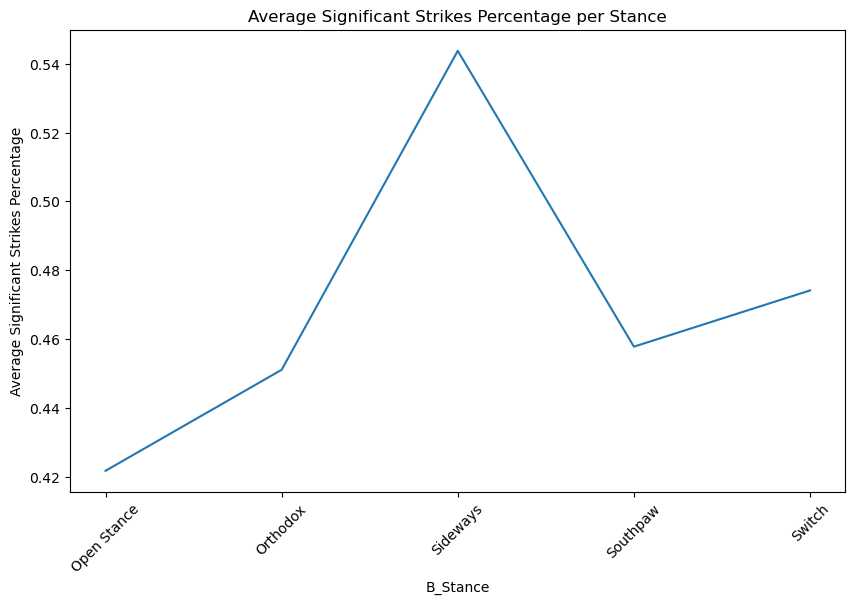

In [30]:
avg_sig_strikes_by_stance = df.groupby('B_Stance')['B_avg_SIG_STR_pct'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='B_Stance', y='B_avg_SIG_STR_pct', data=avg_sig_strikes_by_stance)
plt.title('Average Significant Strikes Percentage per Stance')
plt.xlabel('B_Stance')
plt.ylabel('Average Significant Strikes Percentage')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='B_Stance', y='B_avg_SIG_STR_pct', data=avg_sig_strikes_by_stance)
plt.title('Average Significant Strikes Percentage per Stance')
plt.xlabel('B_Stance')
plt.ylabel('Average Significant Strikes Percentage')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

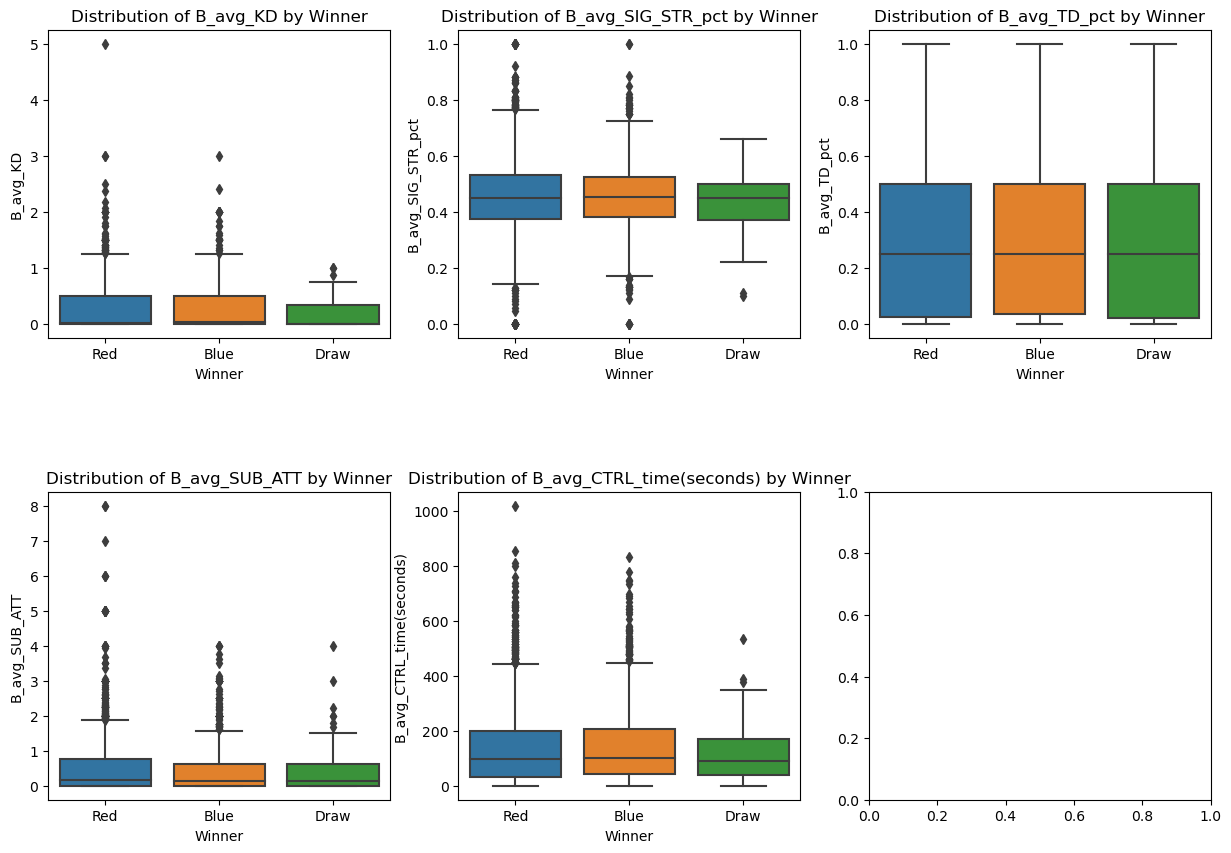

In [31]:
plt.figure(figsize=(15, 10))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

columns = ['B_avg_KD', 'B_avg_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_SUB_ATT', 'B_avg_CTRL_time(seconds)']

for i, col in enumerate(columns):
    sns.boxplot(x='Winner', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Winner')
    axes[i].set_xlabel('Winner')
    axes[i].set_ylabel(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

<Figure size 1500x1000 with 0 Axes>

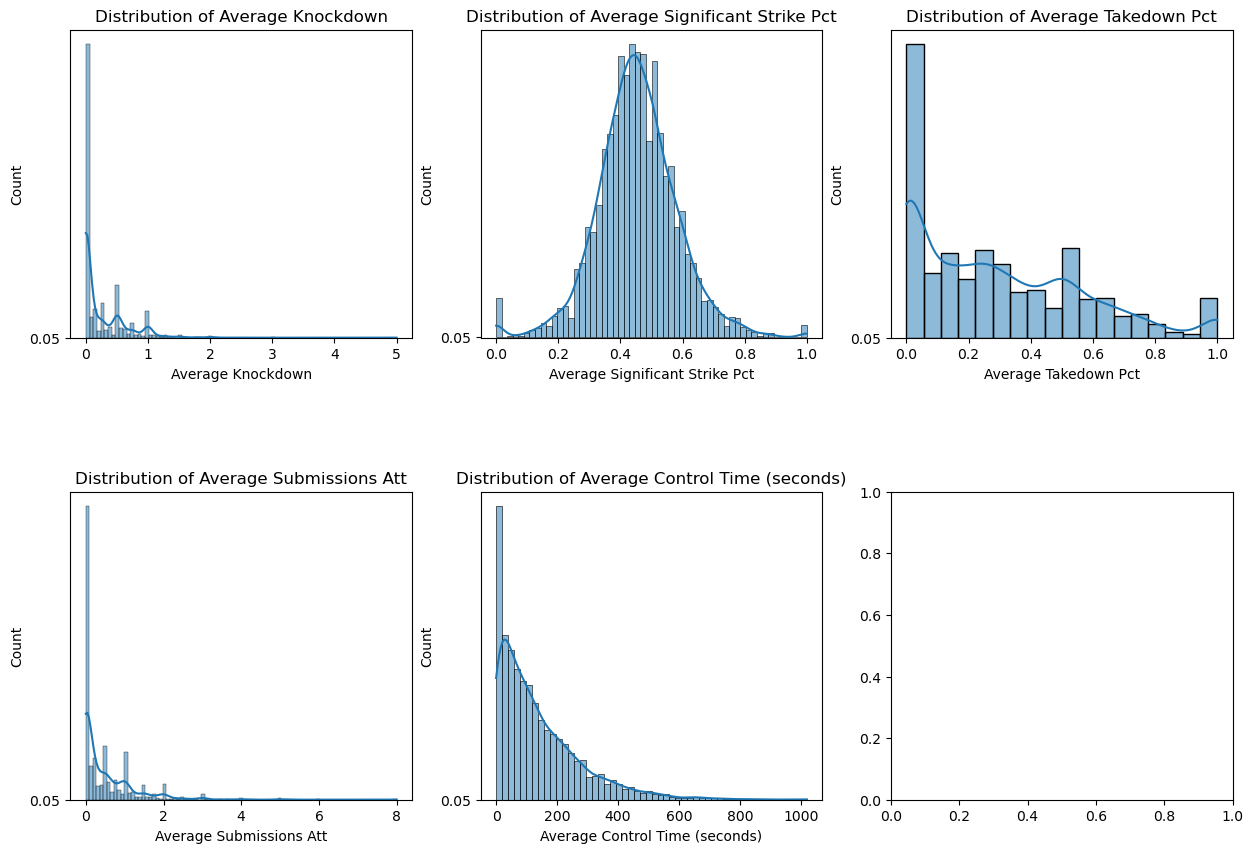

In [32]:
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()
columns = ['B_avg_KD', 'B_avg_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_SUB_ATT', 'B_avg_CTRL_time(seconds)']
column_names = ['Average Knockdown', 'Average Significant Strike Pct', 'Average Takedown Pct', 'Average Submissions Att', 'Average Control Time (seconds)']

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column_names[i]}')
    axes[i].set_xlabel(column_names[i])
    axes[i].boxplot(df[col], vert=False, positions=[0.05], widths=0.2)

plt.subplots_adjust(hspace=0.5)
plt.show()

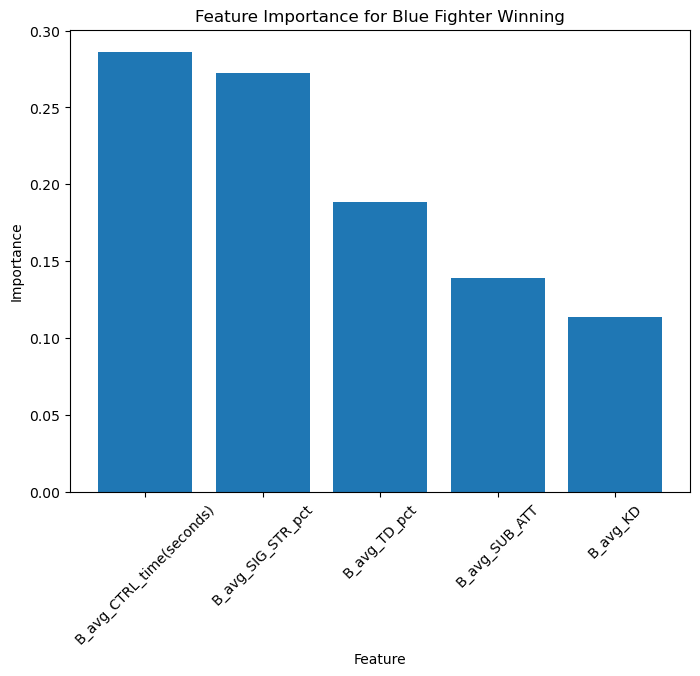

In [33]:
le = LabelEncoder()
df['Winner'] = le.fit_transform(df['Winner'])

X_new = X[['B_avg_KD', 'B_avg_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_SUB_ATT', 'B_avg_CTRL_time(seconds)']]
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_new.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Blue Fighter Winning')
plt.show()

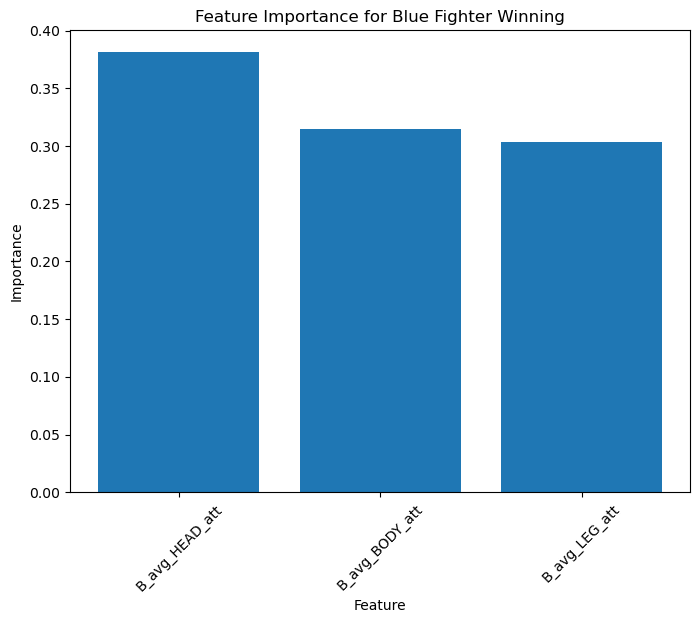

In [34]:
le = LabelEncoder()
df['Winner'] = le.fit_transform(df['Winner'])

X_new = X[['B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att']]
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_new.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Blue Fighter Winning')
plt.show()

<Figure size 1500x500 with 0 Axes>

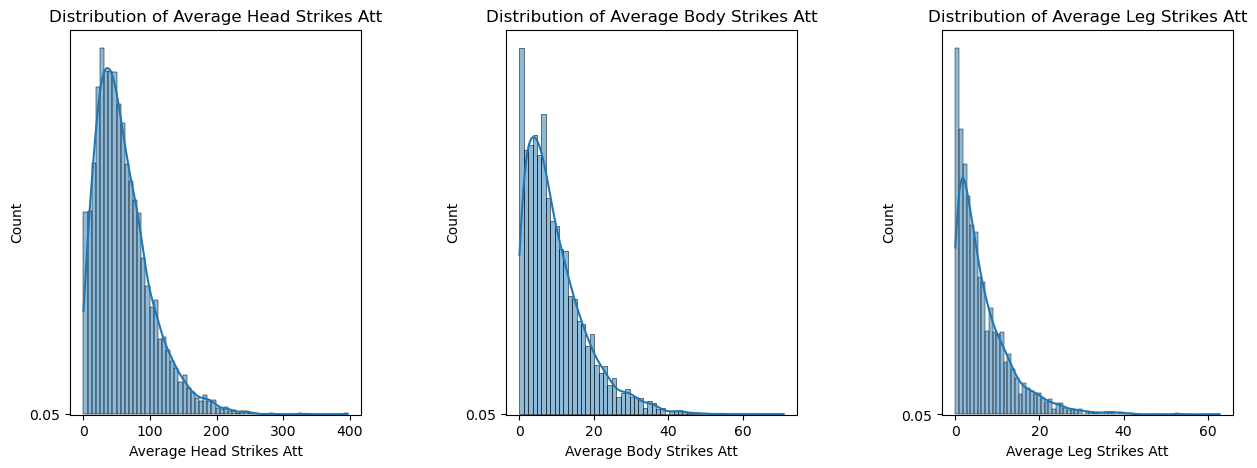

In [35]:
plt.figure(figsize=(15, 5))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


columns = ['B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att']
column_names = ['Average Head Strikes Att', 'Average Body Strikes Att', 'Average Leg Strikes Att']


for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column_names[i]}')
    axes[i].set_xlabel(column_names[i])
    
    axes[i].boxplot(df[col], vert=False, positions=[0.05], widths=0.2)

plt.subplots_adjust(wspace=0.5)
plt.show()

<Figure size 1500x500 with 0 Axes>

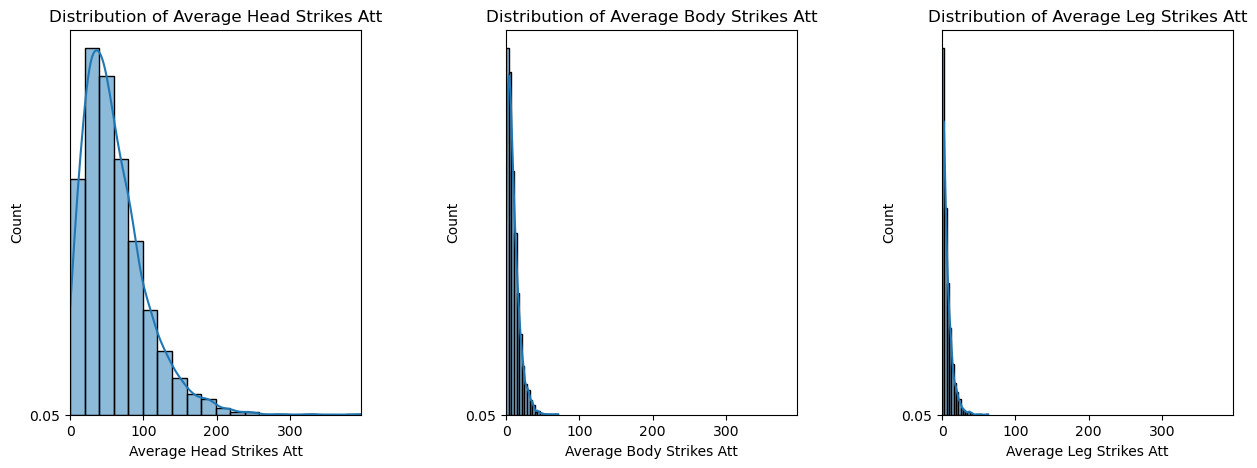

In [36]:
plt.figure(figsize=(15, 5))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

columns = ['B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att']
column_names = ['Average Head Strikes Att', 'Average Body Strikes Att', 'Average Leg Strikes Att']

x_min = min(df[columns].min())
x_max = max(df[columns].max())

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {column_names[i]}')
    axes[i].set_xlabel(column_names[i])
    axes[i].set_xlim(x_min, x_max)  # Set the same x-axis range for all subplots

    axes[i].boxplot(df[col], vert=False, positions=[0.05], widths=0.2)


plt.subplots_adjust(wspace=0.5)
plt.show()

<Figure size 1000x600 with 0 Axes>

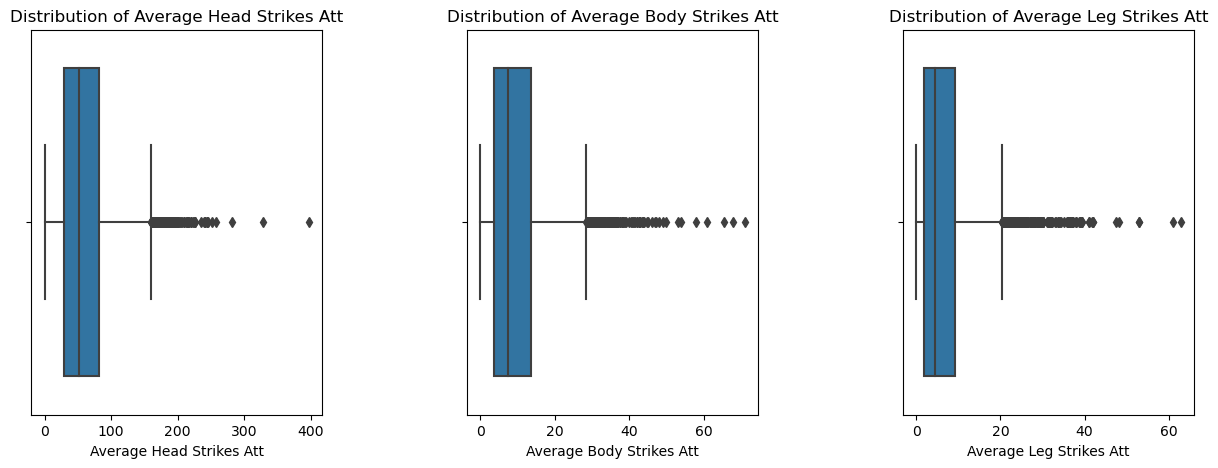

In [37]:
plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

columns = ['B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att']
column_names = ['Average Head Strikes Att', 'Average Body Strikes Att', 'Average Leg Strikes Att']

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i], orient='h')
    axes[i].set_title(f'Distribution of {column_names[i]}')
    axes[i].set_xlabel(column_names[i])

plt.subplots_adjust(wspace=0.5)
plt.show()